Benin Random Forest 10km Grid

In [2]:
import numpy
import pandas
import matplotlib.pyplot as plt
import csv
#import seaborn
import sklearn
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split

In [3]:
import random

random.seed(23)

Load in school counts data with other data and make indicator

In [87]:
grid_data = pandas.read_csv("/home/azureuser/cloudfiles/code/Users/ariley/Data/Schools/Africa/School_Counts/Gridded_10km_Data/BEN_Grid_Data_10km_ghsl.csv")

df = grid_data.dropna()

df.head()

df['SCHOOLS'] = [int(i>0) for i in df['NUMPOINTS']]

print(df['SCHOOLS'])

df.head()


0       1
1       0
2       0
3       0
4       0
       ..
1112    1
1113    1
1114    1
1115    1
1116    1
Name: SCHOOLS, Length: 1117, dtype: int64


,Unnamed: 0,x,y,land,built_s,built_v,NUMPOINTS,pop,smod_10,smod_11,smod_12,smod_13,smod_21,smod_22,smod_23,smod_30,id,country,SCHOOLS
0,1,279000,1519000,1000000.00,918.01,2296.19,1,2754.751976,0,91,8,1,0,0,0,0,1,1,1
1,2,249000,1509000,997028.34,4.84,12.14,0,14.602684,0,100,0,0,0,0,0,0,2,1,0
2,3,259000,1509000,999813.00,1.82,4.55,0,5.467709,0,100,0,0,0,0,0,0,3,1,0
3,4,269000,1509000,999934.74,0.20,0.50,0,0.600847,0,100,0,0,0,0,0,0,4,1,0
4,5,279000,1509000,1000000.00,140.01,350.33,0,419.956108,0,99,1,0,0,0,0,0,5,1,0


Make test and train sets

In [88]:
train, test = train_test_split(df, test_size = .25, random_state = 42)

print(train.head())


train_y = train['SCHOOLS']
train_x = train[['smod_23', 'smod_21', 'land', 'smod_10', 'y', 'pop', 'built_v', 'smod_12', 'x', 'smod_13', 'smod_11', 'smod_22', 'smod_30', 'built_s']]
test_y = test['SCHOOLS']
test_x = test[['smod_23', 'smod_21', 'land', 'smod_10', 'y', 'pop', 'built_v', 'smod_12', 'x', 'smod_13', 'smod_11', 'smod_22', 'smod_30', 'built_s']]
print(train_y.head())
print(train_x.head())

     Unnamed: 0       x        y        land  built_s   built_v  NUMPOINTS  \
361         362  249000  1309000   998331.54  1737.64   7461.79          0   
790         791  199000  1089000   999082.12     3.18      7.99          0   
533         534  139000  1239000   998464.07  4800.59  12037.35          8   
708         709  149000  1149000  1000000.00  3541.56   8867.03          2   
583         584  199000  1219000  1000000.00   540.68   1353.81          0   

             pop  smod_10  smod_11  smod_12  smod_13  smod_21  smod_22  \
361  3123.296774        0       98        1        1        0        0   
790     3.796240        0      100        0        0        0        0   
533  4891.346790        0       72       28        0        0        0   
708  4212.937485        0       80       18        2        0        0   
583   463.561106        0      100        0        0        0        0   

     smod_23  smod_30   id  country  SCHOOLS  
361        0        0  362        1    

To tune the model we consider a paramater grid

We use some common options

In [74]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [70, 80, 90, 100, 110],
    'max_features': [2, 4, 6, 8, 10, 12, 14],
    'min_samples_leaf': [2, 3, 4, 5],
    'min_samples_split': [2, 4, 6, 8, 10, 12, 14],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

Run and tune model

In [75]:
grid_search.fit(train_x, train_y)

grid_search.best_params_

rf_mod = grid_search.best_estimator_
print(rf_mod)

rfc_pred = rf_mod.predict(test_x)

Fitting 5 folds for each of 3920 candidates, totalling 19600 fits
[CV] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV

In [76]:
print('Best hyperparameters:',  rf_mod)

Best hyperparameters: RandomForestClassifier(max_depth=100, max_features=6, min_samples_leaf=3,
                       min_samples_split=14)


In [105]:
param_grid2 = {
    'bootstrap': [True],
    'max_depth': [90, 95, 100, 105, 110],
    'max_features': [5, 6, 7],
    'min_samples_leaf': [3],
    'min_samples_split': [13, 14, 15, 16],
    'n_estimators': [100, 200, 300, 1000]
}

rf2 = RandomForestClassifier()
grid_search2 = GridSearchCV(estimator = rf2, param_grid = param_grid2, 
                          cv = 5, n_jobs = -1, verbose = 2)


In [106]:
grid_search2.fit(train_x, train_y)

grid_search2.best_params_
rf_mod2 = grid_search2.best_estimator_
print(rf_mod2)

rfc_pred2 = rf_mod2.predict(test_x)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


13715.65s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
13715.83s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
13716.02s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
13716.19s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
13716.37s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
13716.56s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
13716.74s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
13716.92s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=3, min_samples_split=13, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=3, min_samples_split=13, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=3, min_samples_split=13, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=3, min_samples_split=13, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=3, min_samples_split=13, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=3, min_samples_split=13, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=3, min_samples_split=13, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=90, max_features=5, min_sam

In [107]:
print('Best hyperparameters:',  rf_mod2)

Best hyperparameters: RandomForestClassifier(max_depth=110, max_features=7, min_samples_leaf=3,
                       min_samples_split=15, n_estimators=300)


In [39]:
param_grid3 = {
    'bootstrap': [True],
    'max_depth': [100, 110, 120, 130],
    'max_features': [7],
    'min_samples_leaf': [3],
    'min_samples_split': [15],
    'n_estimators': [300]
}

rf3 = RandomForestClassifier()
grid_search3 = GridSearchCV(estimator = rf3, param_grid = param_grid3, 
                          cv = 5, n_jobs = -1, verbose = 2)


In [40]:
grid_search3.fit(train_x, train_y)

grid_search3.best_params_
rf_mod3 = grid_search3.best_estimator_
print(rf_mod3)

rfc_pred3 = rf_mod3.predict(test_x)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[CV] END bootstrap=True, max_depth=100, max_features=7, min_samples_leaf=3, min_samples_split=15, n_estimators=300; total time=   0.8s
[CV] END bootstrap=True, max_depth=100, max_features=7, min_samples_leaf=3, min_samples_split=15, n_estimators=300; total time=   0.8s
[CV] END bootstrap=True, max_depth=100, max_features=7, min_samples_leaf=3, min_samples_split=15, n_estimators=300; total time=   0.8s
[CV] END bootstrap=True, max_depth=100, max_features=7, min_samples_leaf=3, min_samples_split=15, n_estimators=300; total time=   0.8s
[CV] END bootstrap=True, max_depth=100, max_features=7, min_samples_leaf=3, min_samples_split=15, n_estimators=300; total time=   0.8s
[CV] END bootstrap=True, max_depth=110, max_features=7, min_samples_leaf=3, min_samples_split=15, n_estimators=300; total time=   0.9s
[CV] END bootstrap=True, max_depth=110, max_features=7, min_samples_leaf=3, min_samples_split=15, n_estimators=300; total time=   0.8s
[CV] END bootstrap=True, max_depth=110, max_features=7,

In [111]:
print('Best hyperparameters:',  rf_mod3)

Best hyperparameters: RandomForestClassifier(max_depth=120, max_features=7, min_samples_leaf=3,
                       min_samples_split=15, n_estimators=300)


Run random forest on tuned model

In [56]:
rf_mod4 = RandomForestClassifier(max_depth=120, max_features=7, min_samples_leaf=3,
                       min_samples_split=15, n_estimators=300)
rf_model1 = rf_mod4.fit(train_x, train_y)

Save outputs

In [42]:
import pickle

model_file = "/home/azureuser/cloudfiles/code/Users/ariley/Data/Schools/Africa/School_Counts/Outputs/BEN_10km_Grid_RandomForest_ghsl_Python_fit.pkl"

with open(model_file, 'wb') as file:  
    pickle.dump(rf_model1, file)

Can load with this

In [43]:
import pickle

model_file = "/home/azureuser/cloudfiles/code/Users/ariley/Data/Schools/Africa/School_Counts/Outputs/BEN_10km_Grid_RandomForest_ghsl_Python_fit.pkl"

with open(model_file, 'rb') as file:  
    rf_model1 = pickle.load(file)


Predict and save

In [44]:
pred_model1= rf_model1.predict(test_x)
print(classification_report(test_y, pred_model1))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85       110
           1       0.86      0.98      0.92       170

    accuracy                           0.89       280
   macro avg       0.91      0.87      0.88       280
weighted avg       0.90      0.89      0.89       280



Confusion Matrix 

In [9]:
model_file = "/home/azureuser/cloudfiles/code/Users/ariley/Data/Schools/Africa/School_Counts/Outputs/BEN_10km_Grid_RandomForest_ghsl_Python_predict.pkl"

with open(model_file, 'wb') as file:  
    pickle.dump(pred_model1, file)

NameError: name 'pred_model1' is not defined

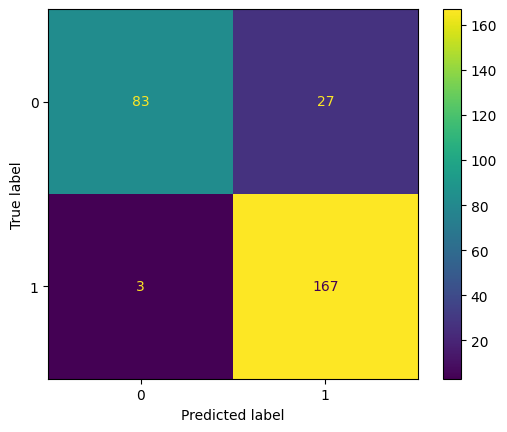

In [45]:
cm = confusion_matrix(test_y, pred_model1)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

Accuracy, Precision, and Recall

In [46]:
accuracy = accuracy_score(test_y, pred_model1)
precision = precision_score(test_y, pred_model1)
recall = recall_score(test_y, pred_model1)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8928571428571429
Precision: 0.8608247422680413
Recall: 0.9823529411764705


Feature importance

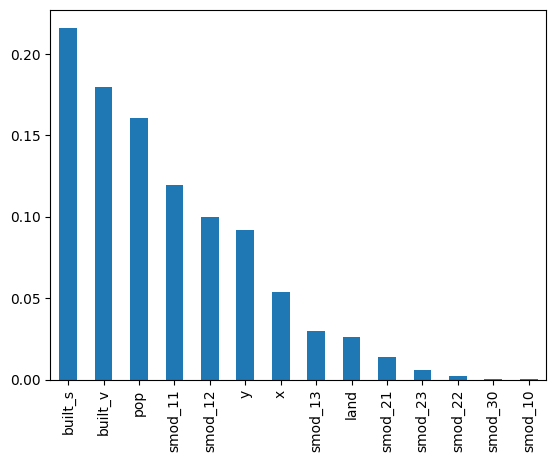

In [47]:
feature_importances = pandas.Series(rf_model1.feature_importances_, index=train_x.columns).sort_values(ascending=False)

feature_importances.plot.bar();

Rerun with Important Variables

Top 8

In [48]:
print(feature_importances.iloc[0:7])

built_s    0.216350
built_v    0.179565
pop        0.161032
smod_11    0.119403
smod_12    0.099800
y          0.091932
x          0.053687
dtype: float64


In [89]:
train_y2 = train['SCHOOLS']
train_x2 = train[['built_v', 'built_s', 'pop', 'smod_11', 'y', 'smod_12', 'x']]
test_y2 = test['SCHOOLS']
test_x2 = test[['built_v', 'built_s', 'pop', 'smod_11', 'y', 'smod_12', 'x']]
print(train_y2.head())
print(train_x2.head())

361    0
790    0
533    1
708    1
583    0
Name: SCHOOLS, dtype: int64
      built_v  built_s          pop  smod_11        y  smod_12       x
361   7461.79  1737.64  3123.296774       98  1309000        1  249000
790      7.99     3.18     3.796240      100  1089000        0  199000
533  12037.35  4800.59  4891.346790       72  1239000       28  139000
708   8867.03  3541.56  4212.937485       80  1149000       18  149000
583   1353.81   540.68   463.561106      100  1219000        0  199000


In [58]:
rf4 = RandomForestClassifier(n_estimators=200)
rf_model_subset = rf4.fit(train_x2, train_y2)

In [59]:
pred_model_subset = rf4.predict(test_x2)
print(classification_report(test_y2, pred_model_subset))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85       110
           1       0.87      0.96      0.92       170

    accuracy                           0.89       280
   macro avg       0.90      0.87      0.88       280
weighted avg       0.90      0.89      0.89       280



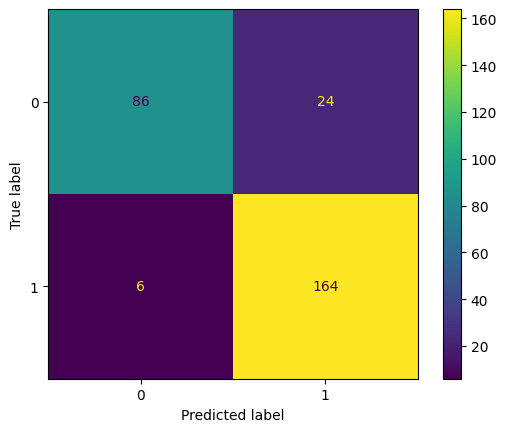

In [60]:
cm = confusion_matrix(test_y2, pred_model_subset)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [61]:
accuracy = accuracy_score(test_y2, pred_model_subset)
precision = precision_score(test_y2, pred_model_subset)
recall = recall_score(test_y2, pred_model_subset)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8928571428571429
Precision: 0.8723404255319149
Recall: 0.9647058823529412


And tune

In [78]:
param_grid4 = {
    'bootstrap': [True],
    'max_depth': [100, 110, 120],
    'max_features': [2,3,4,5,6],
    'min_samples_leaf': [1,2,3,4],
    'min_samples_split': [15, 18, 20, 22],
    'n_estimators': [300]
}

rf4 = RandomForestClassifier()
grid_search4 = GridSearchCV(estimator = rf4, param_grid = param_grid4, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [79]:
grid_search4.fit(train_x2, train_y2)

grid_search4.best_params_
rf_mod4 = grid_search4.best_estimator_
print(rf_mod4)

rfc_pred4 = rf_mod4.predict(test_x2)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=1, min_samples_split=18, n_estimators=300; total time=   0.7s[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.7s

[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=1, min_samples_split=18, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=1, min_samples_split=18, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time

In [80]:
print('Best hyperparameters:',  rf_mod4)

Best hyperparameters: RandomForestClassifier(max_depth=110, max_features=4, min_samples_leaf=4,
                       min_samples_split=20, n_estimators=300)


In [90]:
rf5 = RandomForestClassifier(n_estimators=200)
rf_model_subset_tuned = rf5.fit(train_x2, train_y2)

In [91]:
pred_model_subset_tuned = rf_model_subset_tuned.predict(test_x2)
print(classification_report(test_y2, pred_model_subset_tuned))

              precision    recall  f1-score   support

           0       0.92      0.78      0.85       110
           1       0.87      0.96      0.91       170

    accuracy                           0.89       280
   macro avg       0.90      0.87      0.88       280
weighted avg       0.89      0.89      0.89       280



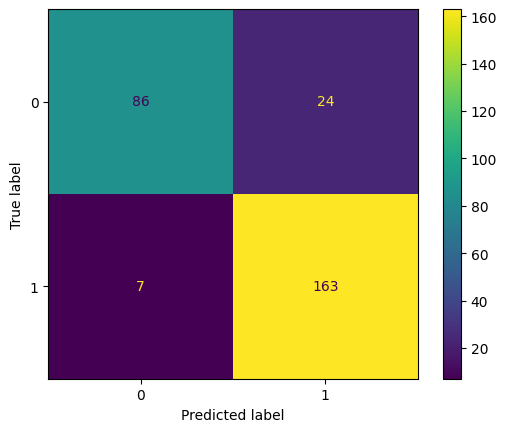

In [92]:
cm = confusion_matrix(test_y2, pred_model_subset_tuned)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [93]:
accuracy = accuracy_score(test_y2, pred_model_subset_tuned)
precision = precision_score(test_y2, pred_model_subset_tuned)
recall = recall_score(test_y2, pred_model_subset_tuned)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8892857142857142
Precision: 0.8716577540106952
Recall: 0.9588235294117647


In [85]:
import pickle

model_file = "/home/azureuser/cloudfiles/code/Users/ariley/Data/Schools/Africa/School_Counts/Outputs/BEN_10km_Grid_RandomForest_ghsl_Python_subset_tuned.pkl"

with open(model_file, 'wb') as file:  
    pickle.dump(rf_model4, file)

